## Importing Important Python Libraries

In [7]:
import tensorflow 
import os
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

## One Hot Encoding the target Classes

In [8]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])
#0->tumour(yes)
#1->Normal(No)

OneHotEncoder()

## Creating 3 Important Lists
1.data list for storing image data in numpy array form
2. paths list for string paths for all the images
3.result list for storing one hot encoded form of target classwhether normal or tumour

In [9]:
#this cell updates result list for images with tumour
data=[]
paths=[]
result=[]

for r,d,f in os.walk(r'brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg'in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [10]:
#this cell updates result list for images without  tumour
path=[]
for r,d,f in os.walk(r'brain_tumor_dataset/no'):
    for file in f:
        if '.jpg'in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [11]:
data=np.array(data)
data.shape

(209, 128, 128, 3)

In [12]:
result=np.array(result)
result=result.reshape(209,2)
result.shape


(209, 2)

## Splitting the Data into Training and testing

In [13]:
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

## Model Building

Batch normalisation is a technique for training very deep neural networks that standardizes the inouts to a layer for each mini batch.This has the effect of stabalizing the learning process and dramatically reducing the number of traing epochs required to train the deep neural networks.


In [14]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer='Adamax')
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        4128      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)       

In [15]:
y_train.shape

(167, 2)

In [16]:
history=model.fit(x_train,y_train,epochs=30,batch_size=40,verbose=1,validation_data=(x_test,y_test))

Train on 167 samples, validate on 42 samples
Epoch 1/30
167/167 [==============================] - 27s 161ms/step - loss: 64.5942 - val_loss: 38.1037
Epoch 2/30
167/167 [==============================] - 24s 146ms/step - loss: 12.1561 - val_loss: 16.8044
Epoch 3/30
167/167 [==============================] - 26s 158ms/step - loss: 7.2877 - val_loss: 11.9196
Epoch 4/30
167/167 [==============================] - 26s 154ms/step - loss: 2.9844 - val_loss: 5.5834
Epoch 5/30
167/167 [==============================] - 23s 140ms/step - loss: 3.0089 - val_loss: 5.1247
Epoch 6/30
167/167 [==============================] - 23s 140ms/step - loss: 1.7343 - val_loss: 1.6757
Epoch 7/30
167/167 [==============================] - 30s 181ms/step - loss: 1.2090 - val_loss: 1.5279
Epoch 8/30
167/167 [==============================] - 29s 173ms/step - loss: 1.1315 - val_loss: 1.2754
Epoch 9/30
167/167 [==============================] - 29s 171ms/step - loss: 0.9646 - val_loss: 1.2069
Epoch 10/30
167/167 [==

##  Plotting Losses

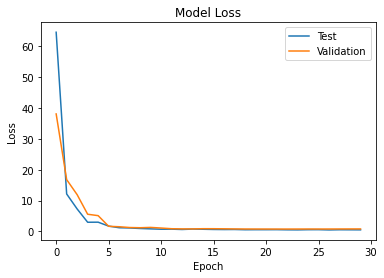

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()            

## 1 Evaluating The Model and Printing Confusion Matrix
 ## 2 Calculating Overall Accuracy of Our Model


In [18]:
# Evaluate the model
predictions = model.predict(x_test, batch_size= 40)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(y_test, axis= 1)

In [19]:
# Print Confusion matrix


cm = confusion_matrix(actuals, predictions)
print(cm)

[[ 6  7]
 [14 15]]


In [20]:
# Final accuracy of our model
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.5000


## Checking The Model and Predicting for a few Brain MRI Images

In [21]:
def names(number):
    if number==0:
        return 'Yes,Its a Tumor'
    else:
        return 'No, Its not a tumor'

69.2969799041748% Confidence This Is No, Its not a tumor


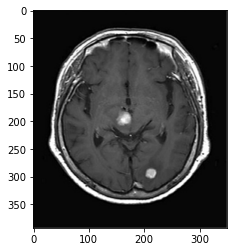

In [22]:
from matplotlib.pyplot import imshow
img = Image.open(r"brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

85.7613205909729% Confidence This Is A Yes,Its a Tumor


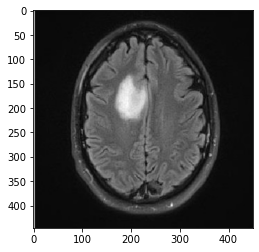

In [23]:
from matplotlib.pyplot import imshow
img = Image.open(r"brain_tumor_dataset/yes/Y8.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))